# <center>DIAMOND PRICE PREDICTION

<img src='bas-van-den-eijkhof-ypk__5RJOBM-unsplash.jpg'>

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

carat (0.2-5.01): The carat is the diamond’s physical weight measured in metric carats. One carat equals 0.20 gram and is subdivided into 100 points.

cut (Fair, Good, Very Good, Premium, Ideal): The quality of the cut. The more precise the diamond is cut, the more captivating the diamond is to the eye thus of high grade.

color (from J (worst) to D (best)): The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)): Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

depth (43-79): It is the total depth percentage which equals to z / mean(x, y) = 2 * z / (x + y). The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface) as referred in the labelled diagram above.

table (43-95): It is the width of the top of the diamond relative to widest point. It gives diamond stunning fire and brilliance by reflecting lights to all directions which when seen by an observer, seems lustrous.

price ($$326 - $18826): It is the price of the diamond in US dollars. It is our very target column in the dataset.

x (0 - 10.74): Length of the diamond (in mm)
y (0 - 58.9): Width of the diamond (in mm)
z (0 - 31.8): Depth of the diamond (in mm)


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly as pt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('./Diamonds Prices2022.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.shape

(53943, 11)

In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Data Cleaning

In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
df.isnull().mean()*100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

### Data Visualization

#### Hist Plot

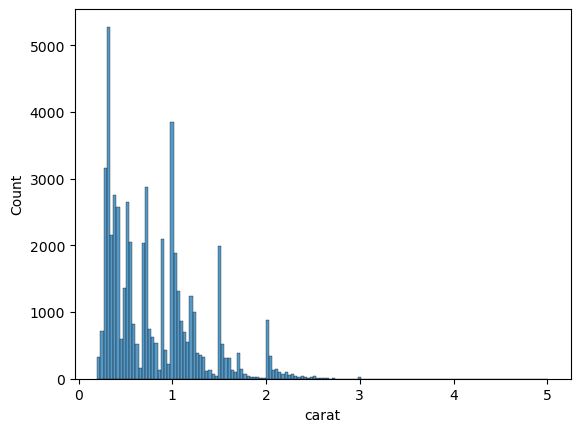

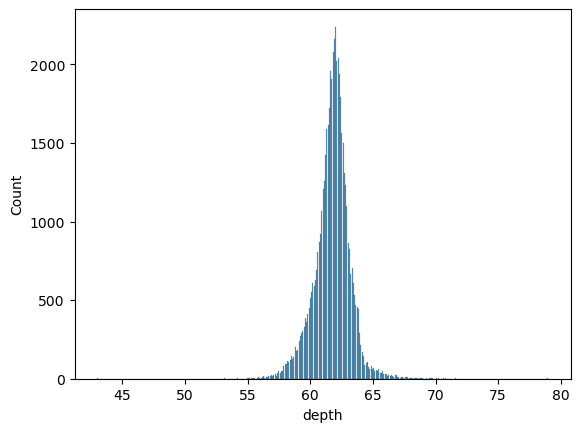

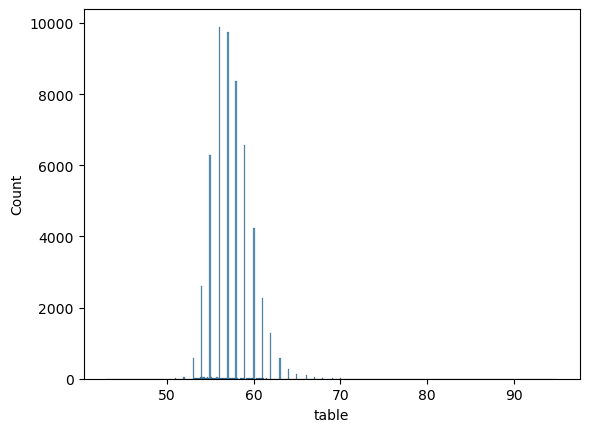

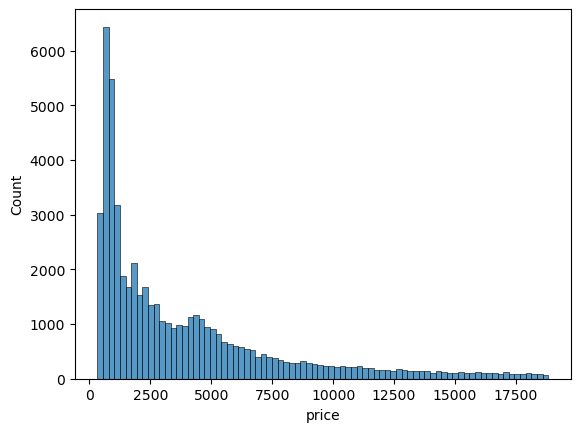

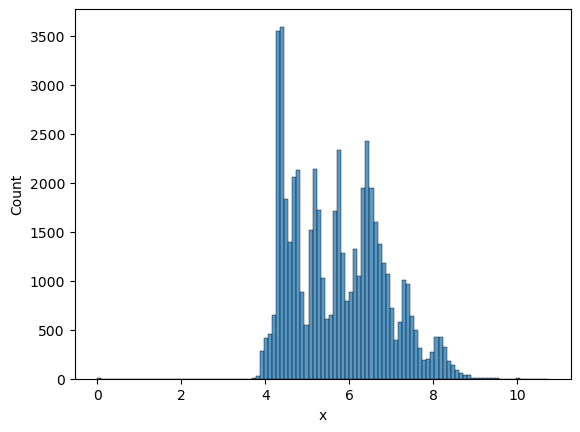

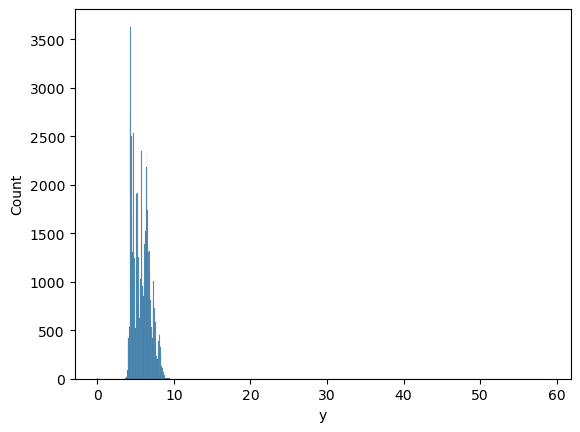

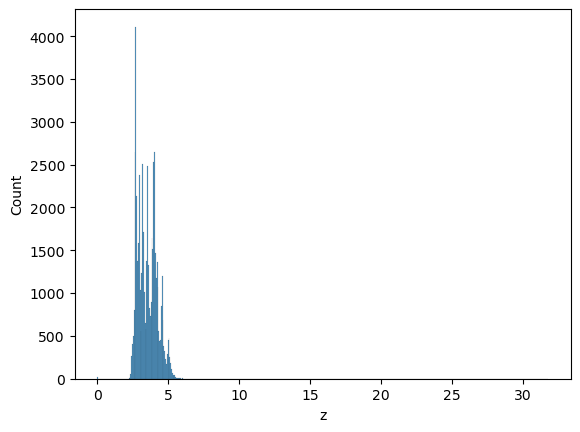

In [8]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.histplot(x=df[i])
        plt.show()

#### KDE Plot

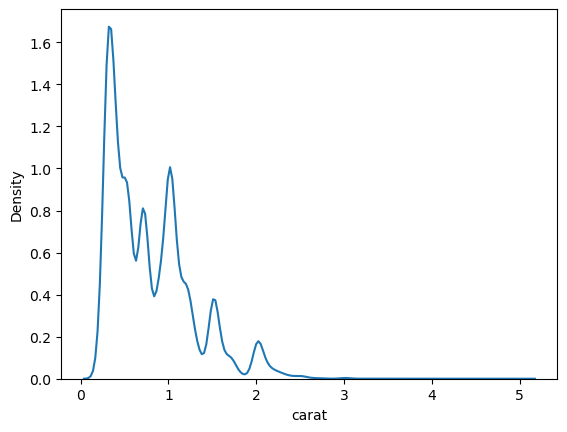

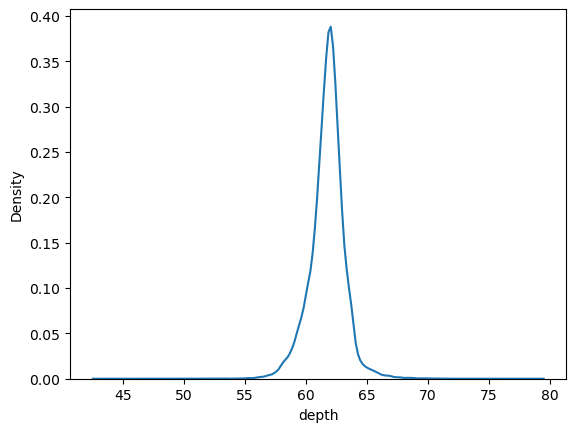

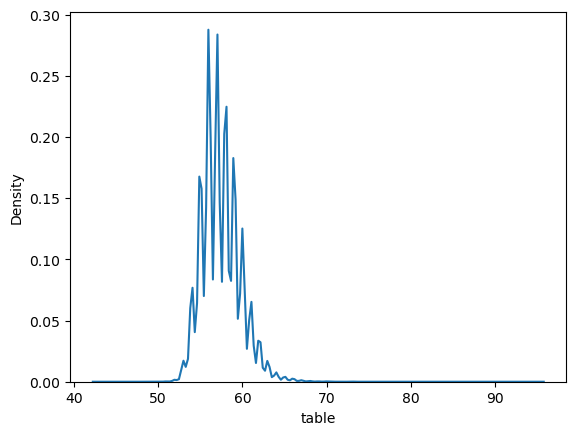

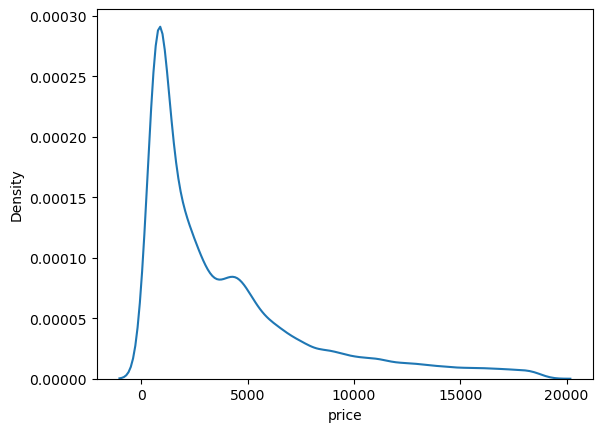

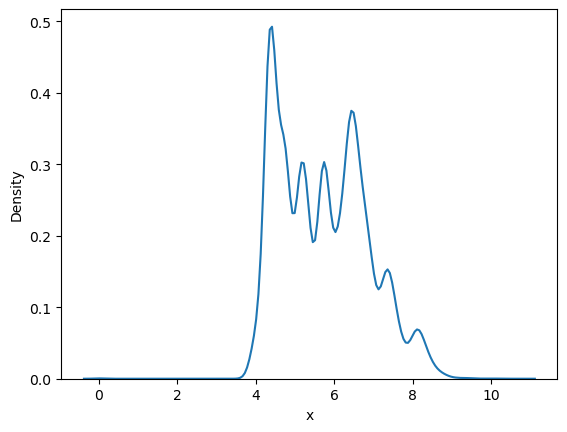

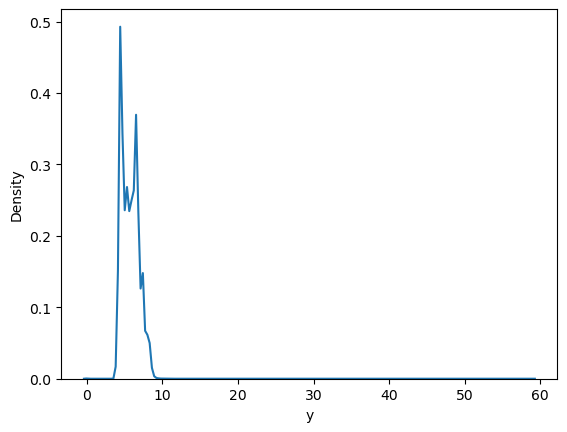

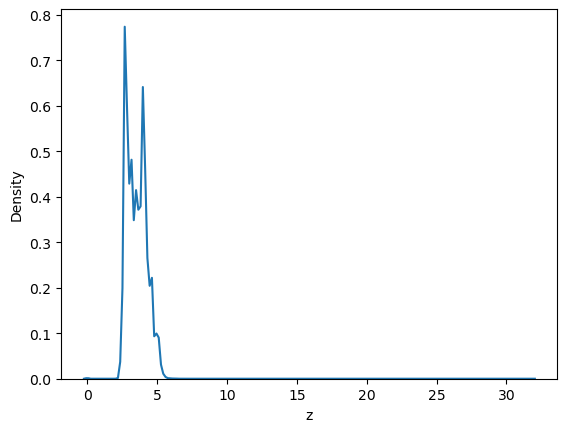

In [9]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.kdeplot(x=df[i])
        plt.show()

#### Multi variate analysis

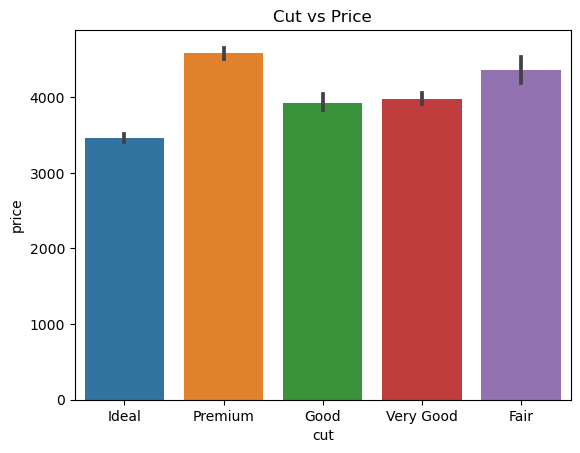

In [10]:
plt.title('Cut vs Price')
sns.barplot(x='cut', y='price', data=df);

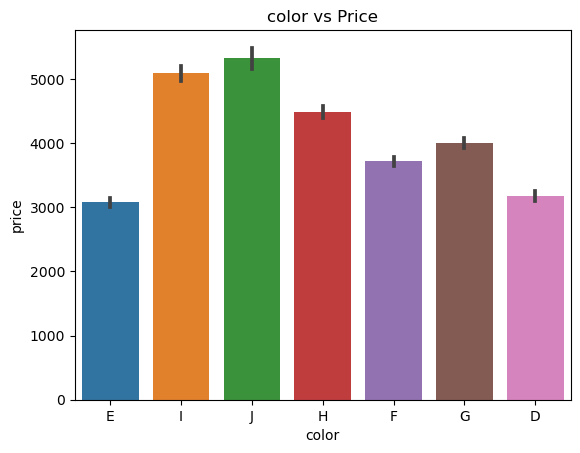

In [11]:
plt.title('color vs Price')
sns.barplot(x='color', y='price', data=df);

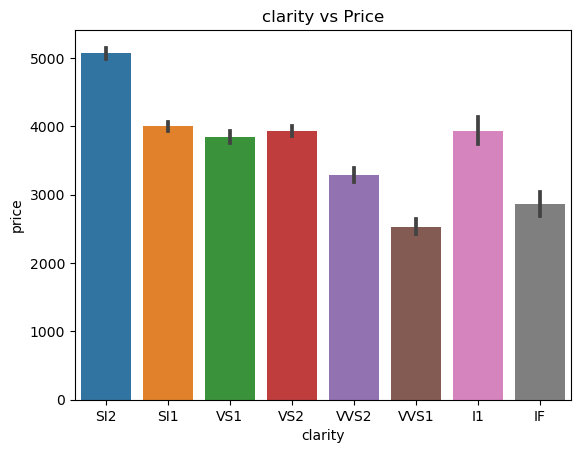

In [12]:
plt.title('clarity vs Price')
sns.barplot(x='clarity', y='price', data=df);

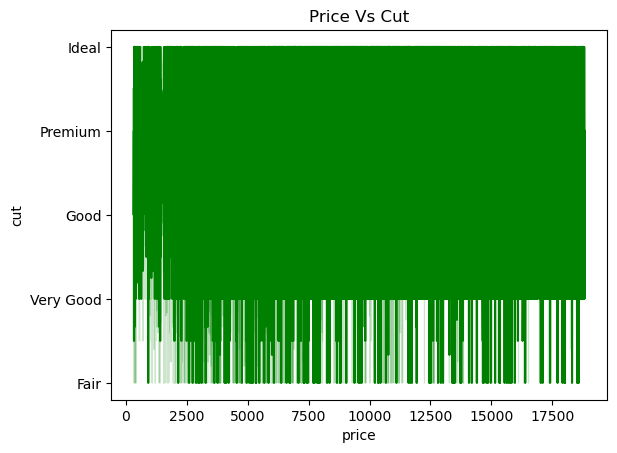

In [13]:
plt.title('Price Vs Cut')
sns.lineplot('price','cut',data=df,color='Green')
plt.show()

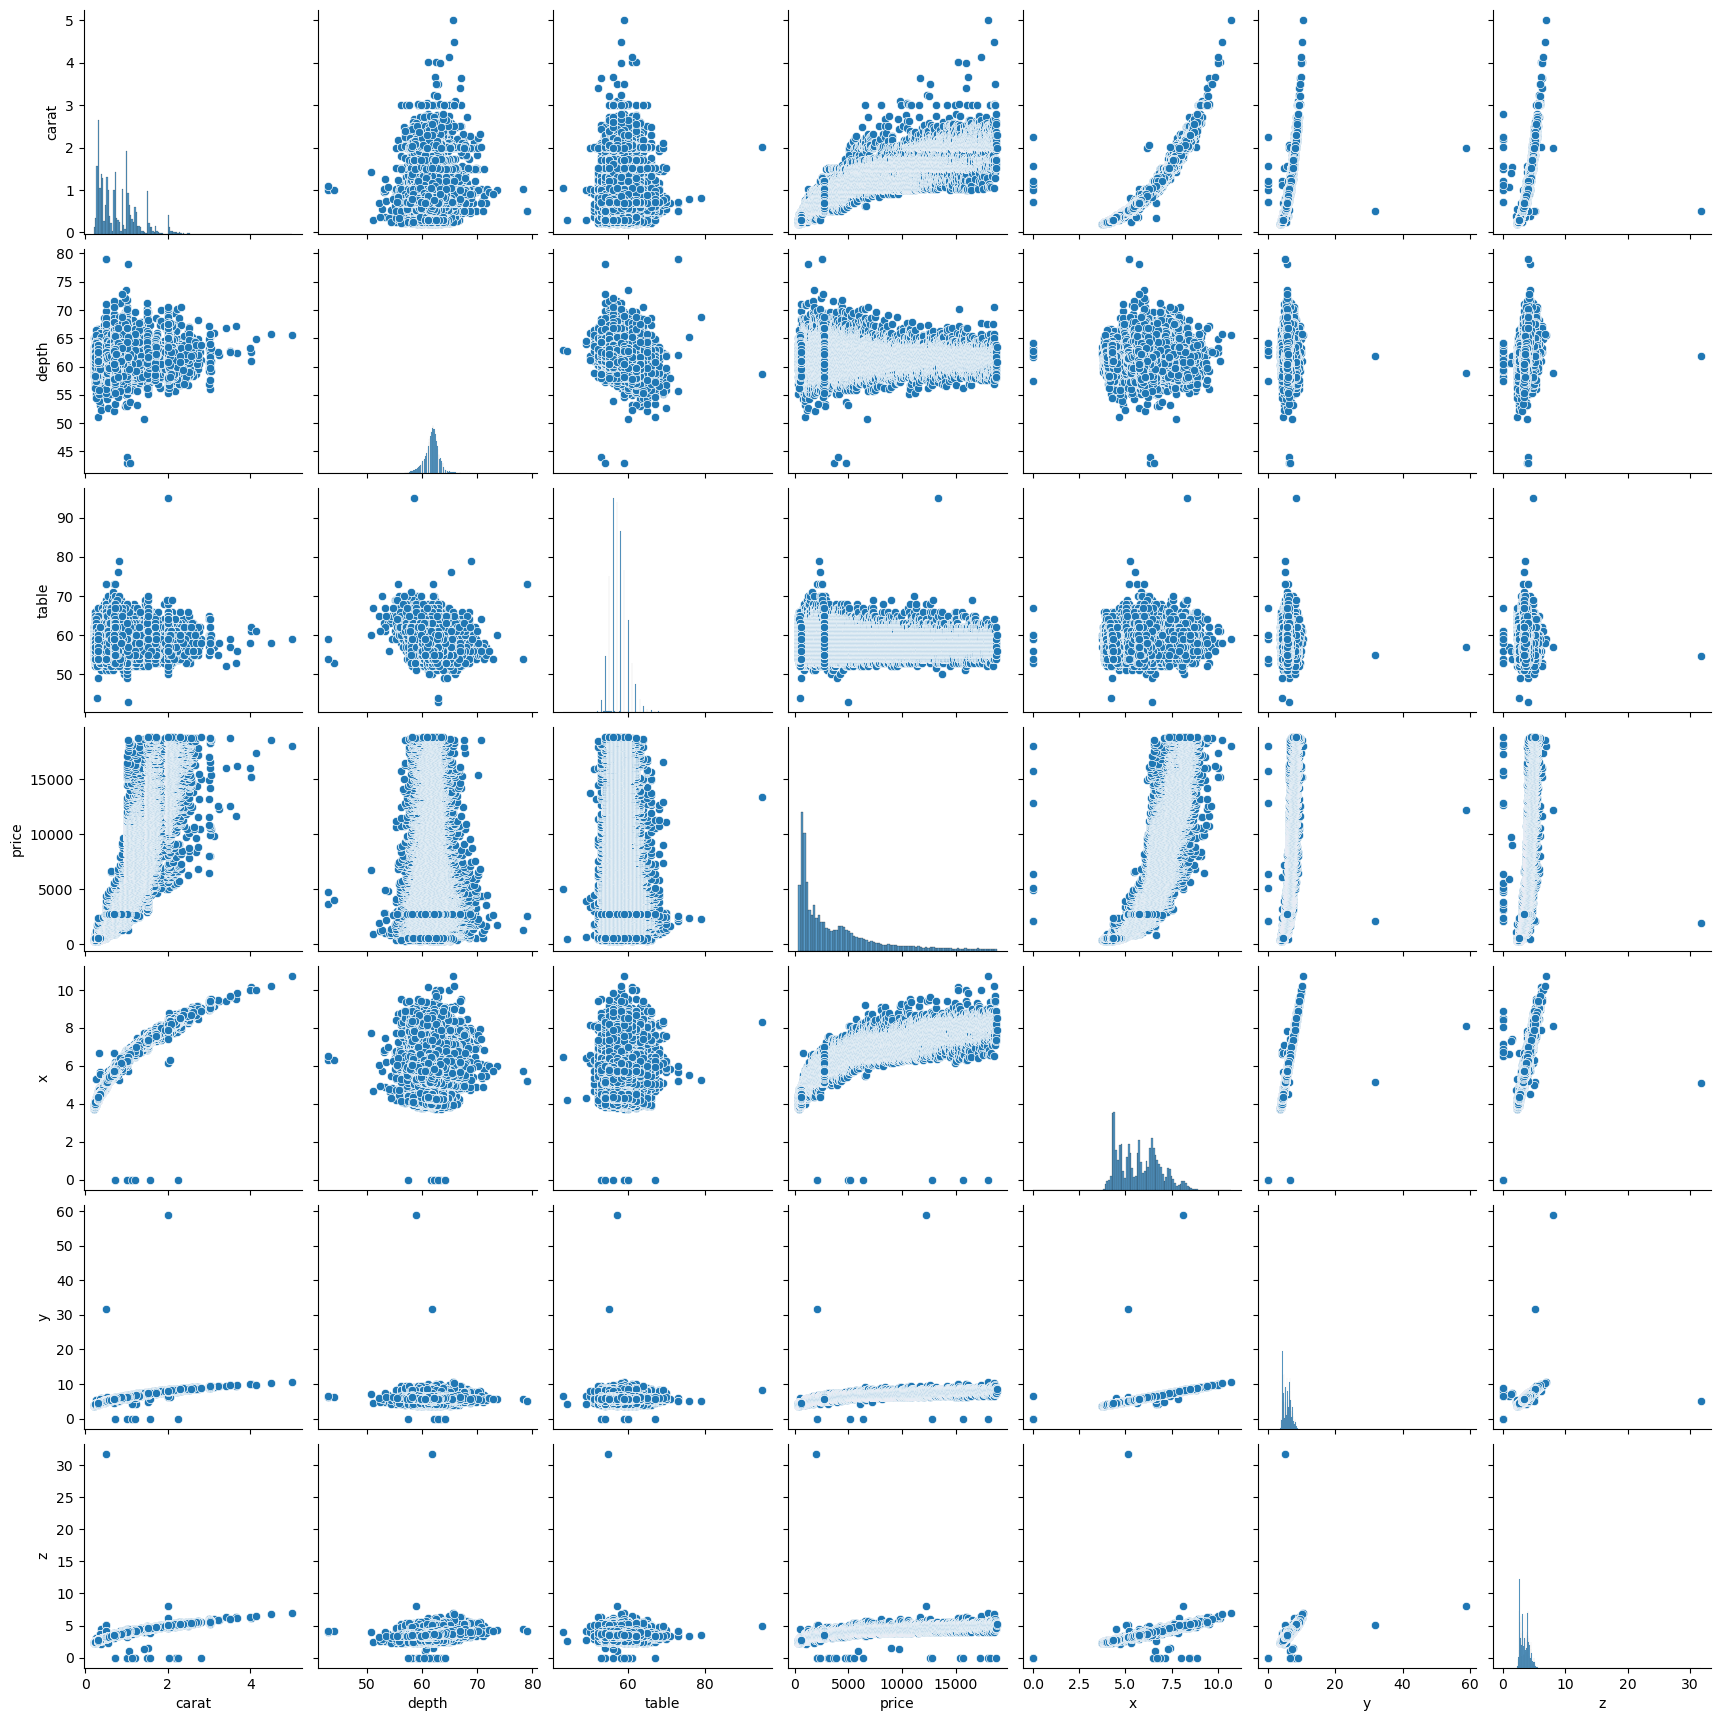

In [14]:
sns.pairplot(df);

#### Find and Remove Outlier

In [16]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [17]:
for column in df.columns:
    if df[column].dtype != 'object':
        UL,LL = outlier_limit(df[column])
        df[column]=np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

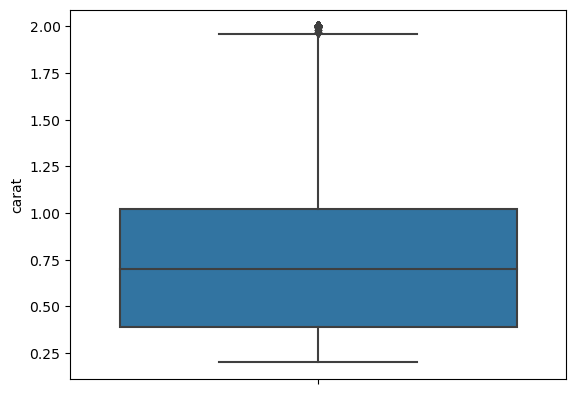

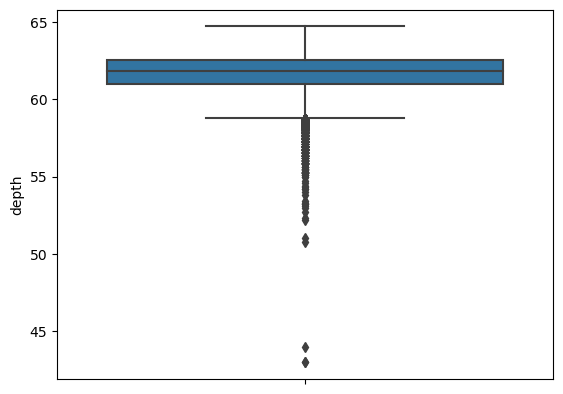

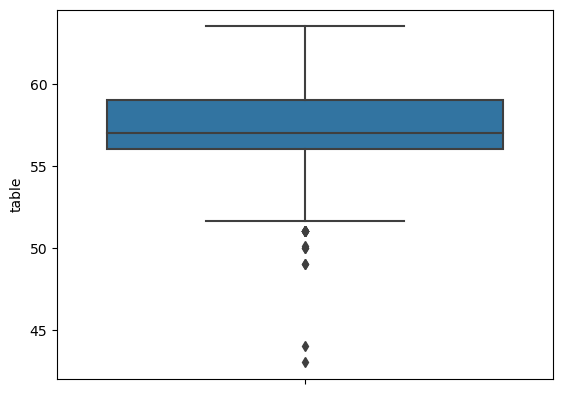

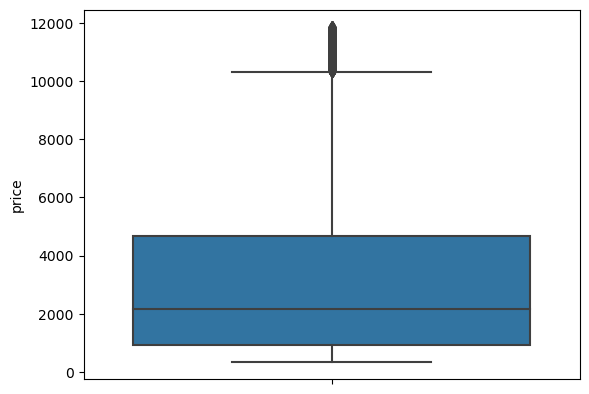

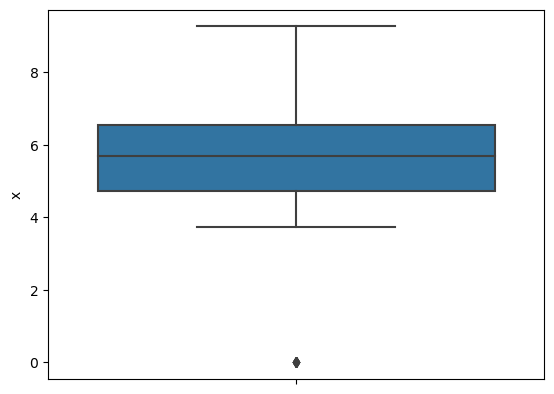

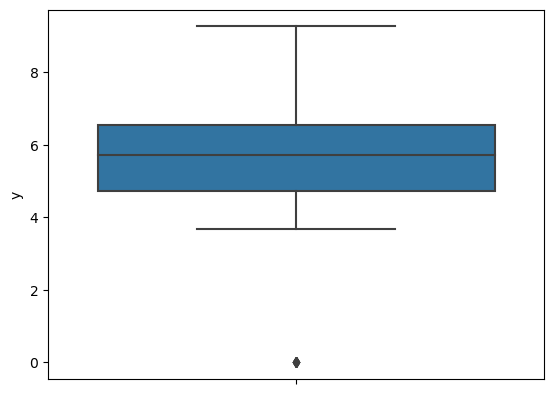

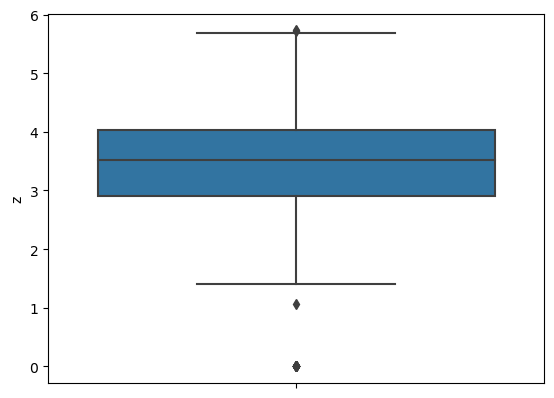

In [18]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show()

In [19]:
df.dropna(inplace=True)

#### Converting the values of the column cut into numeric values

In [20]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [21]:
df.cut.replace({
    'Ideal':5,'Premium':4,'Good':1, 'Very Good':2, 'Fair':3
},inplace=True)

In [23]:
df.dropna(inplace=True)

#### Label Encoding

In [25]:
le = LabelEncoder()
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])

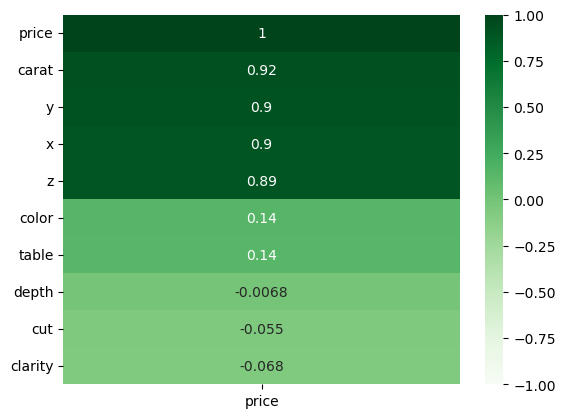

In [27]:
sns.heatmap(df.corr()[["price"]].sort_values(by="price", ascending=False), vmin=-1, vmax=1, annot=True,cmap="Greens");

#### Feature selection

In [28]:
x= df[['carat', 'y','x', 'z','table']].values
y = df[['price']].values

#### Scalling

In [29]:
sc = StandardScaler()
x = sc.fit_transform(x)

#### Finding the best model using Cross validation

In [30]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [31]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  965.9762921716407
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  965.9445727672737
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  948.4404429268407
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  1350.3986988805013
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  1028.1515868264794
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1098.8214159143688
*********************************************

#### Splitting the data into training and testing

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
RandomForestRegressor()
y_pred = model.predict(x)
result = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"),dtype=float)
result.head()

,ACTUAL,PREDICTION
0,326.0,406.995
1,326.0,352.010
2,334.0,381.500
3,335.0,516.820
4,336.0,372.440


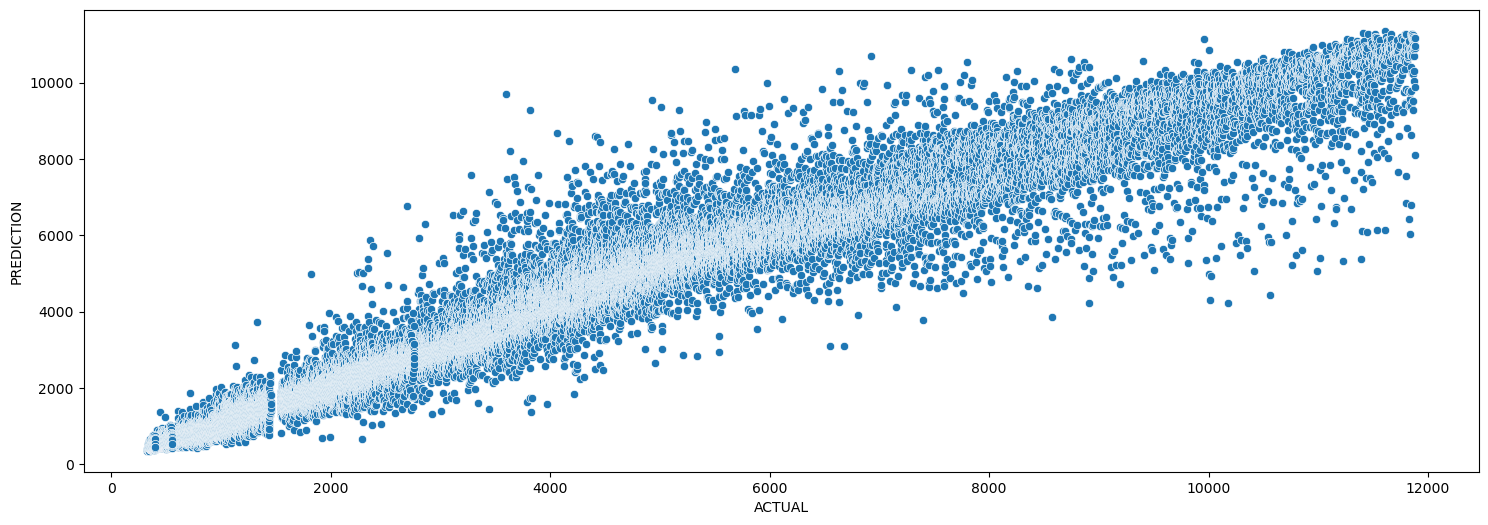

In [34]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='ACTUAL', y='PREDICTION', data=result);

In [40]:
model.score(x,y)

0.957046266456003